<a href="https://colab.research.google.com/github/ShahdTarek/Cats-and-Dogs-Recognition-categorical_crossentropy-/blob/main/CNN4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d biaiscience/dogs-vs-cats

 98% 797M/817M [00:07<00:00, 106MB/s]
100% 817M/817M [00:07<00:00, 108MB/s]


In [ ]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('dogs-vs-cats.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [ ]:
import pandas as pd
import numpy as np
import cv2 as cv
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [ ]:
train_dir = '/content/files/train/train'

In [ ]:
image_path = []
for name in glob('/content/files/train/train/*'):
  if name.endswith('.jpg'):
    image_path.append(name)
    print(name)

print(len(image_path))

Streaming output truncated to the last 5000 lines.
/content/files/train/train/dog.8254.jpg
/content/files/train/train/cat.486.jpg
/content/files/train/train/cat.3593.jpg
/content/files/train/train/dog.3967.jpg
/content/files/train/train/cat.4406.jpg
/content/files/train/train/cat.5668.jpg
/content/files/train/train/cat.8665.jpg
/content/files/train/train/cat.7861.jpg
/content/files/train/train/cat.4664.jpg
/content/files/train/train/cat.969.jpg
/content/files/train/train/dog.5866.jpg
/content/files/train/train/cat.1348.jpg
/content/files/train/train/dog.6695.jpg
/content/files/train/train/dog.4427.jpg
/content/files/train/train/cat.9659.jpg
/content/files/train/train/cat.753.jpg
/content/files/train/train/cat.2222.jpg
/content/files/train/train/cat.10598.jpg
/content/files/train/train/cat.9133.jpg
/content/files/train/train/dog.10410.jpg
/content/files/train/train/dog.5302.jpg
/content/files/train/train/dog.8815.jpg
/content/files/train/train/dog.7030.jpg
/content/files/train/train/dog

In [ ]:
df = pd.DataFrame(columns = ['image', 'label'])
df

,image,label


In [ ]:
for path in image_path:
  if 'cat' in path:
    df = df.append({'image':path, 'label':'cat'}, ignore_index=True)
  else:
    df = df.append({'image':path, 'label':'dog'}, ignore_index=True)

In [ ]:
df

,image,label
0,/content/files/train/train/cat.3216.jpg,cat
1,/content/files/train/train/cat.9219.jpg,cat
2,/content/files/train/train/cat.7657.jpg,cat
3,/content/files/train/train/cat.5913.jpg,cat
4,/content/files/train/train/dog.6483.jpg,dog
...,...,...
24995,/content/files/train/train/cat.11843.jpg,cat
24996,/content/files/train/train/cat.11704.jpg,cat
24997,/content/files/train/train/dog.8860.jpg,dog
24998,/content/files/train/train/cat.7961.jpg,cat


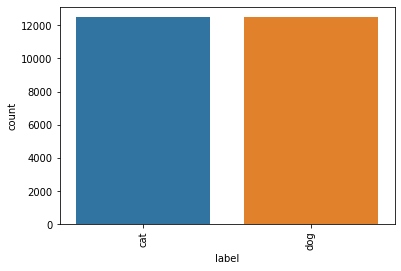

In [ ]:
x = sn.countplot(data=df, x='label')
plt.xticks(rotation=90);

In [ ]:
from sklearn.utils import shuffle
df = shuffle(df)
df.head()

,image,label
13865,/content/files/train/train/dog.2773.jpg,dog
3571,/content/files/train/train/cat.7648.jpg,cat
13843,/content/files/train/train/dog.6463.jpg,dog
2642,/content/files/train/train/dog.11612.jpg,dog
2578,/content/files/train/train/cat.4458.jpg,cat


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,
                             validation_split=0.2)

In [ ]:
train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    x_col='image',
    y_col='label',
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=16,
    class_mode="categorical",
    shuffle=True,
    seed=42,
    subset='training'
)

Found 20000 validated image filenames belonging to 2 classes.


In [ ]:
valid_generator = datagen.flow_from_dataframe(
    dataframe=df,
    x_col='image',
    y_col='label',
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=16,
    class_mode="categorical",
    shuffle=True,
    seed=42,
    subset='validation'
)

Found 5000 validated image filenames belonging to 2 classes.


In [ ]:
X_train, y_train = train_generator.next()

In [ ]:
print(X_train.shape, y_train.shape)

(16, 224, 224, 3) (16, 2)


In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.models import Sequential

model = Sequential()

model.add(Conv2D(filters=8, kernel_size=2, activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=16, activation='relu', kernel_size=2))
model.add(MaxPooling2D(2))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 223, 223, 8)       104       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 8)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 8)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 16)      528       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 48400)             0

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, epochs=10, validation_data=valid_generator, verbose=1)

Epoch 1/10
1250/1250 [==============================] - 688s 549ms/step - loss: 0.6521 - accuracy: 0.6546 - val_loss: 0.5913 - val_accuracy: 0.6912
Epoch 2/10
1250/1250 [==============================] - 683s 547ms/step - loss: 0.5123 - accuracy: 0.7462 - val_loss: 0.5544 - val_accuracy: 0.7062
Epoch 3/10
1250/1250 [==============================] - 688s 550ms/step - loss: 0.4197 - accuracy: 0.8061 - val_loss: 0.4999 - val_accuracy: 0.7542
Epoch 4/10
1250/1250 [==============================] - 687s 550ms/step - loss: 0.3016 - accuracy: 0.8701 - val_loss: 0.5730 - val_accuracy: 0.7326
Epoch 5/10
1250/1250 [==============================] - 685s 548ms/step - loss: 0.1782 - accuracy: 0.9307 - val_loss: 0.6672 - val_accuracy: 0.7496
Epoch 6/10
1250/1250 [==============================] - 689s 551ms/step - loss: 0.0948 - accuracy: 0.9660 - val_loss: 0.8450 - val_accuracy: 0.7318
Epoch 7/10
1250/1250 [==============================] - 688s 550ms/step - loss: 0.0625 - accuracy: 0.9789 - val_